# Case Study 2 : Data Mining in Yelp Data


Please download the Yelp dataset in Case Study 2 in BrightSpace. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

### Answer: 
In today's digital age, internet reviews are important to a company's success. However, forecasting the number of reviews a business will obtain is difficult because it is determined by a number of factors, including the business's quality, location, and marketing activities. In this study, we hope to create a predictive model that can forecast the number of reviews a company will obtain based on its average star rating and the amount of reviews it has previously gotten. By doing so, we intend to help businesses better understand the elements that influence their review counts and build strategies for increasing their online presence."

We aim to collect data on businesses and the top businesses among them by categorizing them by id, review counts, school website, and so on.

He we are also using checking objects of business_id

# Data Collection/Processing: 

In [5]:
import json
import pandas as pd

# Opening the provided JSON file which has Yelp business data and reading it
with open('yelp_academic_dataset_business.json', 'r', encoding="utf8") as f:
    businesses = [json.loads(line) for line in f]

# Converting the list of business dictionaries into a Pandas DataFrame    
business_df = pd.DataFrame(businesses)

# Printing the DataFrame
print(business_df,"business_df")



                   business_id                             name  \
0       Apn5Q_b6Nz61Tq4XzPdf9A             Minhas Micro Brewery   
1       AjEbIBw6ZFfln7ePHha9PA              CK'S BBQ & Catering   
2       O8S5hYJ1SMc8fA4QBtVujA                    La Bastringue   
3       bFzdJJ3wp3PZssNEsyU23g                  Geico Insurance   
4       8USyCYqpScwiNEb58Bt6CA                    Action Engine   
...                        ...                              ...   
188588  sMQAZ3DkfrURFoJAyOhjEw                     Ross Massage   
188589  6hvuCibNS4uECetHb9MCQQ            Four Seasons Boutique   
188590  KleCXFYOmdACcQUvf6_XEg              Walmart Supercenter   
188591  3_fIsSxN2RBovQ_6EFtLzA  Residence Inn Charlotte Concord   
188592  NkOvIueadjFUxeCyq_uQEw     Tito Jimy Salon and Boutique   

                     neighborhood                    address        city  \
0                                          1314 44 Avenue NE     Calgary   
1                                          

In [6]:
# Selecting only the columns we want
business_df_new = business_df[['business_id', 'categories', 'stars', 'review_count']]

with open('yelp_academic_dataset_checkin.json', 'r', encoding="utf8") as f:
    checkins = [json.loads(line) for line in f]

checkin_df = pd.DataFrame(checkins)
checkin_df_explore = pd.DataFrame(checkins)

checkin_df = pd.concat([checkin_df['business_id'], checkin_df['checkin_info'].apply(pd.Series)], axis=1)
checkin_df = checkin_df.melt(id_vars='business_id', var_name='hour-day', value_name='checkin_count')

# Split the hour-day column into separate hour and day columns
checkin_df[['hour', 'day']] = checkin_df['hour-day'].str.split('-', expand=True)
checkin_df = checkin_df.drop('hour-day', axis=1)

# Perform the left merge with business_df_new
#merged_df = pd.merge(business_df_new, checkin_df, left_on=['business_id'], right_on=['business_id', 'hour', 'day'], how='left')
merged_df = pd.merge(business_df_new, checkin_df, left_on='business_id', right_on='business_id', how='left')


# Calculate the average checkin count, star rating, and number of reviews
merged_df['avg_checkin_count'] = merged_df.groupby('business_id')['checkin_count'].transform('mean') 
merged_df['avg_star_rating'] = merged_df.groupby('business_id')['stars'].transform('mean') 
merged_df['num_reviews'] = merged_df.groupby('business_id')['review_count'].transform('sum')

# Print the merged DataFrame
print(merged_df)



                   business_id  \
0       Apn5Q_b6Nz61Tq4XzPdf9A   
1       AjEbIBw6ZFfln7ePHha9PA   
2       O8S5hYJ1SMc8fA4QBtVujA   
3       bFzdJJ3wp3PZssNEsyU23g   
4       8USyCYqpScwiNEb58Bt6CA   
...                        ...   
188588  sMQAZ3DkfrURFoJAyOhjEw   
188589  6hvuCibNS4uECetHb9MCQQ   
188590  KleCXFYOmdACcQUvf6_XEg   
188591  3_fIsSxN2RBovQ_6EFtLzA   
188592  NkOvIueadjFUxeCyq_uQEw   

                                               categories  stars  \
0       Tours, Breweries, Pizza, Restaurants, Food, Ho...    4.0   
1       Chicken Wings, Burgers, Caterers, Street Vendo...    4.5   
2       Breakfast & Brunch, Restaurants, French, Sandw...    4.0   
3                           Insurance, Financial Services    1.5   
4       Home & Garden, Nurseries & Gardening, Shopping...    2.0   
...                                                   ...    ...   
188588        Skin Care, Beauty & Spas, Day Spas, Massage    2.5   
188589  Fashion, Women's Clothing, Accessories,

# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [7]:
# Select the 'categories' column from the business DataFrame
# and explode it to create a new row for each category
category_counts = business_df['categories'].explode().value_counts()

# Printing the top 10 most popular categories
print(category_counts.head(10))


Restaurants, Pizza            1092
Pizza, Restaurants            1060
Coffee & Tea, Food            1036
Nail Salons, Beauty & Spas    1015
Beauty & Spas, Nail Salons     981
Food, Coffee & Tea             966
Restaurants, Mexican           932
Mexican, Restaurants           908
Beauty & Spas, Hair Salons     893
Restaurants, Chinese           889
Name: categories, dtype: int64


**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [8]:
# Join the two DataFrames on the 'business\_id' field
combined_df = pd.merge(business_df, checkin_df_explore, on='business_id', how='left')
print(combined_df,"combined_df")

# Count the number of checkins for each business
checkin_counts = combined_df.groupby('business_id').size().reset_index(name='checkin_count')

# Sort the businesses by their checkin counts and print the top 10
top_businesses = checkin_counts.nlargest(10, 'checkin_count')

print(top_businesses)


                   business_id                             name  \
0       Apn5Q_b6Nz61Tq4XzPdf9A             Minhas Micro Brewery   
1       AjEbIBw6ZFfln7ePHha9PA              CK'S BBQ & Catering   
2       O8S5hYJ1SMc8fA4QBtVujA                    La Bastringue   
3       bFzdJJ3wp3PZssNEsyU23g                  Geico Insurance   
4       8USyCYqpScwiNEb58Bt6CA                    Action Engine   
...                        ...                              ...   
188588  sMQAZ3DkfrURFoJAyOhjEw                     Ross Massage   
188589  6hvuCibNS4uECetHb9MCQQ            Four Seasons Boutique   
188590  KleCXFYOmdACcQUvf6_XEg              Walmart Supercenter   
188591  3_fIsSxN2RBovQ_6EFtLzA  Residence Inn Charlotte Concord   
188592  NkOvIueadjFUxeCyq_uQEw     Tito Jimy Salon and Boutique   

                     neighborhood                    address        city  \
0                                          1314 44 Avenue NE     Calgary   
1                                          

**(3) Other explorations you would like to present** 


C:\Users\SUNYLoaner\AppData\Local\Temp\ipykernel_10720\1372898918.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


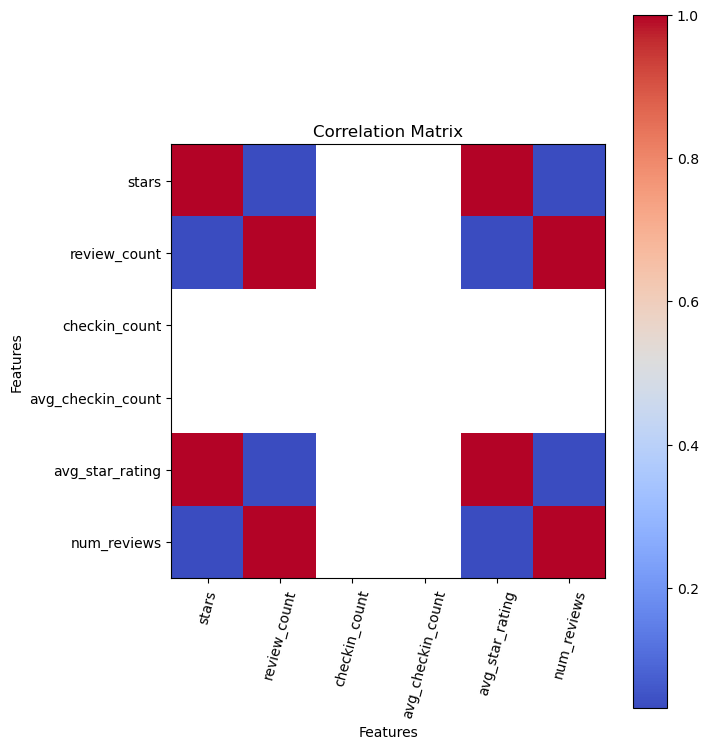

In [9]:
#Correlation matrix

import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(7, 9))
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=75)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()



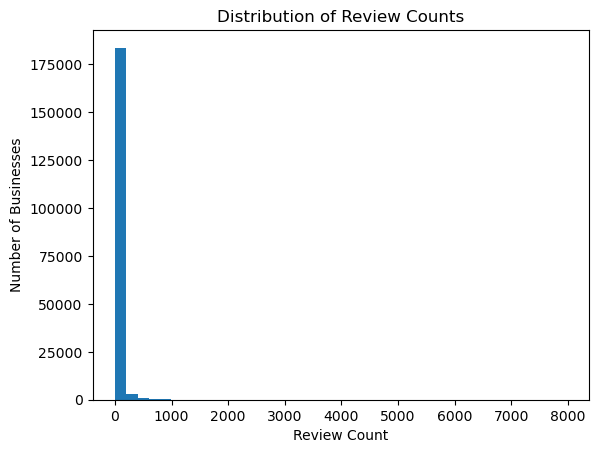

In [13]:
# Create a Histogram
business_df['review_count_numeric'] = pd.to_numeric(business_df['review_count'], errors='coerce')
business_df_numeric = business_df.dropna(subset=['review_count_numeric'])
plt.hist(business_df_numeric['review_count_numeric'], bins=40)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Number of Businesses')
plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

### Answer:
This idea of the solution uses a random forest regressor model to estimate the review count based on each business's average star rating and number of reviews. The random forest regressor is a sophisticated machine learning technique that can handle numerical and categorical variables while being robust to outliers and noise in the data. 
This is an essential and interesting subject since it can assist businesses understand how their ratings and review counts affect their popularity, as well as inspire tactics for enhancing their online visibility.

Write codes to implement the solution in python:

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Prepare the data by selecting the relevant features and target variable
X = merged_df[['avg_star_rating', 'num_reviews']]
y = merged_df['review_count']

print(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

#Create a random forest regressor model 
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train, y_train)

#Model to make predictions on the testing
y_pred = model.predict(X_test)

#Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)


        avg_star_rating  num_reviews
0                   4.0           24
1                   4.5            3
2                   4.0            5
3                   1.5            8
4                   2.0            4
...                 ...          ...
188588              2.5            9
188589              2.0            5
188590              3.0           26
188591              4.0           19
188592              4.0            8

[188593 rows x 2 columns]
Mean squared error:  25.97597430897541


# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


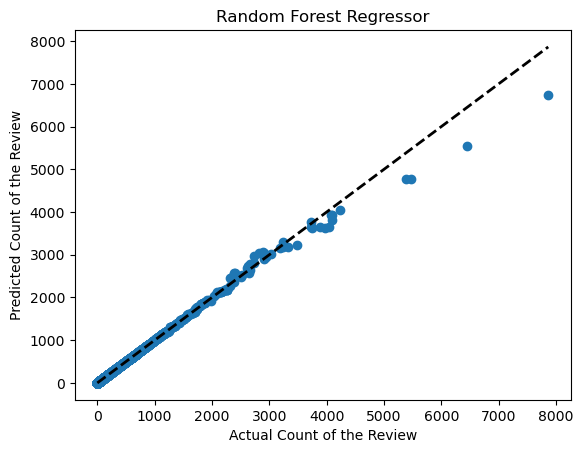

In [39]:

import matplotlib.pyplot as plt

# Perform predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted review counts
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Count of the Review')
plt.ylabel('Predicted Count of the Review')
plt.title('Random Forest Regressor')
plt.show()


The scatter plot shows the actual review count vs. predicted review count for the test set using the random forest regression model. 
Each point in the plot represents a single data point, with the x-coordinate being the actual review count and the y-coordinate 
being the predicted review count. The plot generally demonstrates a strong positive correlation between the predicted and actual
values, which is a good sign. There are some outliers where the predicted value is significantly higher or lower than the actual
value.

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. Please make sure all the plotted tables and figures are in the notebook. 